In [1]:
import numpy as np
import pickle as pkl
import scipy.io
import matplotlib.pyplot as plt

In [ ]:
brain_region = 'right_ALM'
date = 57

# ---------- Load Data ----------
path = f"../data/raw_data/neural_data_{brain_region}/neural_data_{date}_{brain_region}.mat"
data = scipy.io.loadmat(path)
spike_counts_ori = data['region_data']
trial_counts = int(data['trial_count'].squeeze())
num_neurons_ori = spike_counts_ori.shape[1]
spike_counts_reshape_ori = spike_counts_ori.reshape((-1, trial_counts, num_neurons_ori), order='F')

# 计算平均发放率
spike_counts_avg = spike_counts_reshape_ori.mean(axis=1) * 1/0.02
spike_counts_std = spike_counts_reshape_ori.std(axis=1) * 1/0.02


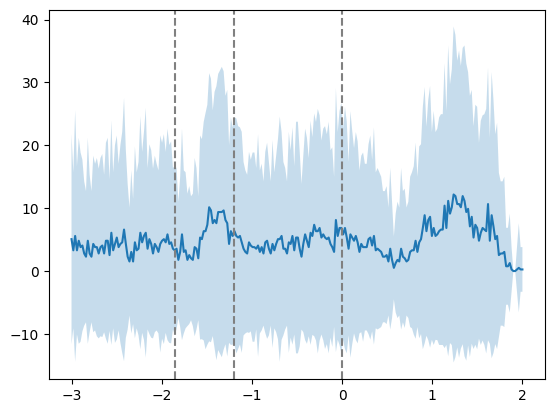

In [4]:
# 可视化神经元在不同时间的平均发放率
neuron_id = 33

plt.plot(np.linspace(-3,2,250), spike_counts_avg[:, neuron_id])
plt.fill_between(np.linspace(-3,2,250),
                 spike_counts_avg[:, neuron_id] - spike_counts_std[:, neuron_id],
                 spike_counts_avg[:, neuron_id] + spike_counts_std[:, neuron_id],
                 alpha=0.25,   # 核心：用同一色系，alpha调浅
                 label='±1 std')
plt.axvline(x=0, color='grey', linestyle='--')
plt.axvline(x=-1.85, color='grey', linestyle='--')
plt.axvline(x=-1.2, color='grey', linestyle='--')

In [82]:
a = spike_counts_reshape_ori.mean(axis=1)
a.shape

(250, 166)